In [34]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import Markdown as md


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import requests
from io import BytesIO
import cv2
import pickle
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('Anime_dataset_2023_1.csv')

In [3]:
def Q1():
    print("\n  Have you delved into the world of anime before, perhaps? \n")
    ans = input("a. Yes\nb. No\n\nYour answer (a/b): ").strip().lower()

    while ans not in ['a', 'b']:
        print("\nPlease enter a valid option (a/b).")
        ans = input("Your answer (a/b): ").strip().lower()
    if ans == 'a':
        return True
    else:
        return False
        

In [4]:
def Q2():
    print("\n Do you find solace and excitement in the captivating world of anime? \n")
    ans = input("a. Yes\nb. No\n\nYour answer (a/b): ").strip().lower()

    while ans not in ['a', 'b']:
        print("\nPlease enter a valid option (a/b).")
        ans = input("Your answer (a/b): ").strip().lower()
    if ans == 'a':
        print("\n Excellent! Together, let's uncover the anime destined to resonate with your soul \n")
        return True
    else:
        print("Fear not! We shall embark on a quest to discover the ideal anime suited just for you!")
        return False
        

In [5]:
def Q3():
   
    ans = input("\n What anime holds the cherished place in the depths of your heart ? \n ")
    return ans
        

In [6]:
def Q4():
    genres = ['Adventure', 'Action', ' Mystery', ' Sci-Fi', 'Ecchi', 'Fantasy',
              ' Comedy', 'Supernatural', 'Girls Love', 'Sports', 'Romance', ' Horror',
              ' Fantasy', ' Girls Love', 'Hentai', 'Horror', 'Award Winning', 'Erotica',
              ' Adventure', ' Slice of Life', ' Drama', 'Gourmet', ' Romance', 'Sci-Fi',
              'Drama', ' Boys Love', ' Gourmet', 'Boys Love', ' Suspense', ' Award Winning',
              ' Sports', 'Slice of Life', 'UNKNOWN', ' Supernatural', 'Avant Garde', ' Hentai', 
              ' Erotica', 'Suspense', ' Avant Garde', ' Ecchi', 'Comedy', 'Mystery']
    print("\n What genres stir the flames of passion within your soul? \n")
    print("OPTIONS( 'Any for all') : \n\t")

    for i,gen in enumerate(genres,start=1):
        print(f"{i}:{gen}")

    select = input("\n Please enter genres you like (comma-separated):").strip().split(',')

    if 'Any' in select:
        return genres
        
    return select


In [7]:
def Q5():
    rating = ['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai','Any']
    
    print("\n What rating of anime ignites your passion for adventure? \n")
    print("OPTIONS( 'Any for all') : \n\t")

    for i,rat in enumerate(rating,start=1):
        print(f"{i}:{rat}")

    select = input("\n Please enter genres you like (comma-separated):").strip().split(',')
    if 'Any' in select:
        select = rating
    return select
    

In [8]:
def Q6():
    type = ['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music','Any']
    
    print("\n  What kind of anime sets your heart ablaze with anticipation? \n")
    print("OPTIONS( 'Any for all') : \n\t")

    for i,typ in enumerate(type,start=1):
        print(f"{i}:{typ}")

    select = input("\n Please enter genres you like (comma-separated):").strip().split(',')
    if 'Any' in select:
        select = type
    return select
    

In [49]:
def intro():
    intro = ''' # Anime Recommendation System

Welcome to our Anime Recommendation System! Are you lost in the vast universe of anime, wondering where to begin or what to watch next? Fear not, as we are here to guide you through the myriad of genres and titles to find the perfect anime that suits your taste.

## Introduction

Kon'nichiwa, fellow anime enthusiast! 🌟

Anime, a form of Japanese animation, has gained immense popularity worldwide for its diverse genres, captivating storytelling, and vibrant characters. With thousands of anime series and movies available, selecting the right one can be a daunting task. Our recommendation system is here to simplify that process for you.

## How It Works

Our recommendation system works by asking you a series of questions about your preferences. Based on your answers, it will analyze your tastes and suggest a list of anime titles tailored to your liking.

## How to Use

To get started, simply answer the questions provided. You can select multiple options for some questions. Once you've completed the questionnaire, our system will generate a list of anime recommendations just for you.

Get ready to embark on an exciting anime journey! '''

    return intro

In [44]:
def extro():
    extro = ''' # Top 10 Recommanded Anime's for you
    '''

In [50]:
intro = intro()
md(intro)

 # Anime Recommendation System

Welcome to our Anime Recommendation System! Are you lost in the vast universe of anime, wondering where to begin or what to watch next? Fear not, as we are here to guide you through the myriad of genres and titles to find the perfect anime that suits your taste.

## Introduction

Kon'nichiwa, fellow anime enthusiast! 🌟

Anime, a form of Japanese animation, has gained immense popularity worldwide for its diverse genres, captivating storytelling, and vibrant characters. With thousands of anime series and movies available, selecting the right one can be a daunting task. Our recommendation system is here to simplify that process for you.

## How It Works

Our recommendation system works by asking you a series of questions about your preferences. Based on your answers, it will analyze your tastes and suggest a list of anime titles tailored to your liking.

## How to Use

To get started, simply answer the questions provided. You can select multiple options for some questions. Once you've completed the questionnaire, our system will generate a list of anime recommendations just for you.

Get ready to embark on an exciting anime journey! 

In [45]:
extro = extro()
md(extro)

<IPython.core.display.Markdown object>

In [11]:
def ask():
    ans = {}
    #Q1 = Q1()
    if(Q1()):
        #yes
       # Q2 = Q2()
        if(Q2()):
            # yes
            ans['fav_anime'] = Q3()
            # anime is selected!!!
        
            #select generes
        ans['fav_gen'] = Q4()
        ans['fav_rat'] = Q5()
        ans['fav_typ'] = Q6()
    else:
        ans['fav_gen'] = Q4()
        ans['fav_rat'] = Q5()
        ans['fav_typ'] = Q6()
    return ans

In [14]:
def contain_fav_gen(genres):
    return any(genre in genres for genre in final_gen)

def contain_fav_rat(ratings):
    return any(rating in ratings for rating in final_rat)

def contain_fav_typ(Types):
    return any(Type in Types for Type in final_typ)



In [26]:
def recommend_Anime(Anime_name):
    try:
        index = Final_df[Final_df['Name'] == Anime_name].index[0]
    except IndexError:
        return "Anime not found in the dataset."
    
    dist = sorted(list(enumerate(similar[index])), reverse=True, key=lambda vector: vector[1])
    
    Recommanded_Animes = pd.DataFrame()
    for i in dist[0:10]:  
        Recommanded_Animes = pd.concat([Recommanded_Animes, Final_df.iloc[[i[0]]]], ignore_index=True)
    
    return Recommanded_Animes


def recommend_Anime_for_nonWatcher():
    Recommanded_Animes = Final_df.sort_values(by=['Score','Popularity','Favorites','Members'],ascending=[False,False,False,False])

    return Recommanded_Animes
    
    

In [32]:
def show(x):
    if 'Image URL' in x.columns and 'Name' in x.columns:
        fig, axes =plt.subplots(2,5,figsize=(20,8))
        axes = axes.flatten()

        for i in range(min(10, len(x))):
            img_url = x['Image URL'].iloc[i]
            title = x['Name'].iloc[i]

            response = requests.get(img_url)
            img_data=BytesIO(response.content)

            image = plt.imread(img_data,format='jpg')

            axes[i].imshow(image)
            axes[i].set_title(title)
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()


  Have you delved into the world of anime before, perhaps? 



a. Yes
b. No

Your answer (a/b):  a



 Do you find solace and excitement in the captivating world of anime? 



a. Yes
b. No

Your answer (a/b):  a



 Excellent! Together, let's uncover the anime destined to resonate with your soul 




 What anime holds the cherished place in the depths of your heart ? 
  Naruto



 What genres stir the flames of passion within your soul? 

OPTIONS( 'Any for all') : 
	
1:Adventure
2:Action
3: Mystery
4: Sci-Fi
5:Ecchi
6:Fantasy
7: Comedy
8:Supernatural
9:Girls Love
10:Sports
11:Romance
12: Horror
13: Fantasy
14: Girls Love
15:Hentai
16:Horror
17:Award Winning
18:Erotica
19: Adventure
20: Slice of Life
21: Drama
22:Gourmet
23: Romance
24:Sci-Fi
25:Drama
26: Boys Love
27: Gourmet
28:Boys Love
29: Suspense
30: Award Winning
31: Sports
32:Slice of Life
33:UNKNOWN
34: Supernatural
35:Avant Garde
36: Hentai
37: Erotica
38:Suspense
39: Avant Garde
40: Ecchi
41:Comedy
42:Mystery



 Please enter genres you like (comma-separated): Ecchi,Fantasy



 What rating of anime ignites your passion for adventure? 

OPTIONS( 'Any for all') : 
	
1:R - 17+ (violence & profanity)
2:PG-13 - Teens 13 or older
3:PG - Children
4:R+ - Mild Nudity
5:G - All Ages
6:Rx - Hentai
7:Any



 Please enter genres you like (comma-separated): Any



  What kind of anime sets your heart ablaze with anticipation? 

OPTIONS( 'Any for all') : 
	
1:TV
2:Movie
3:OVA
4:Special
5:ONA
6:Music
7:Any



 Please enter genres you like (comma-separated): TV,ONA,Movie


Here , Top 10 Recommanded Anime's for you


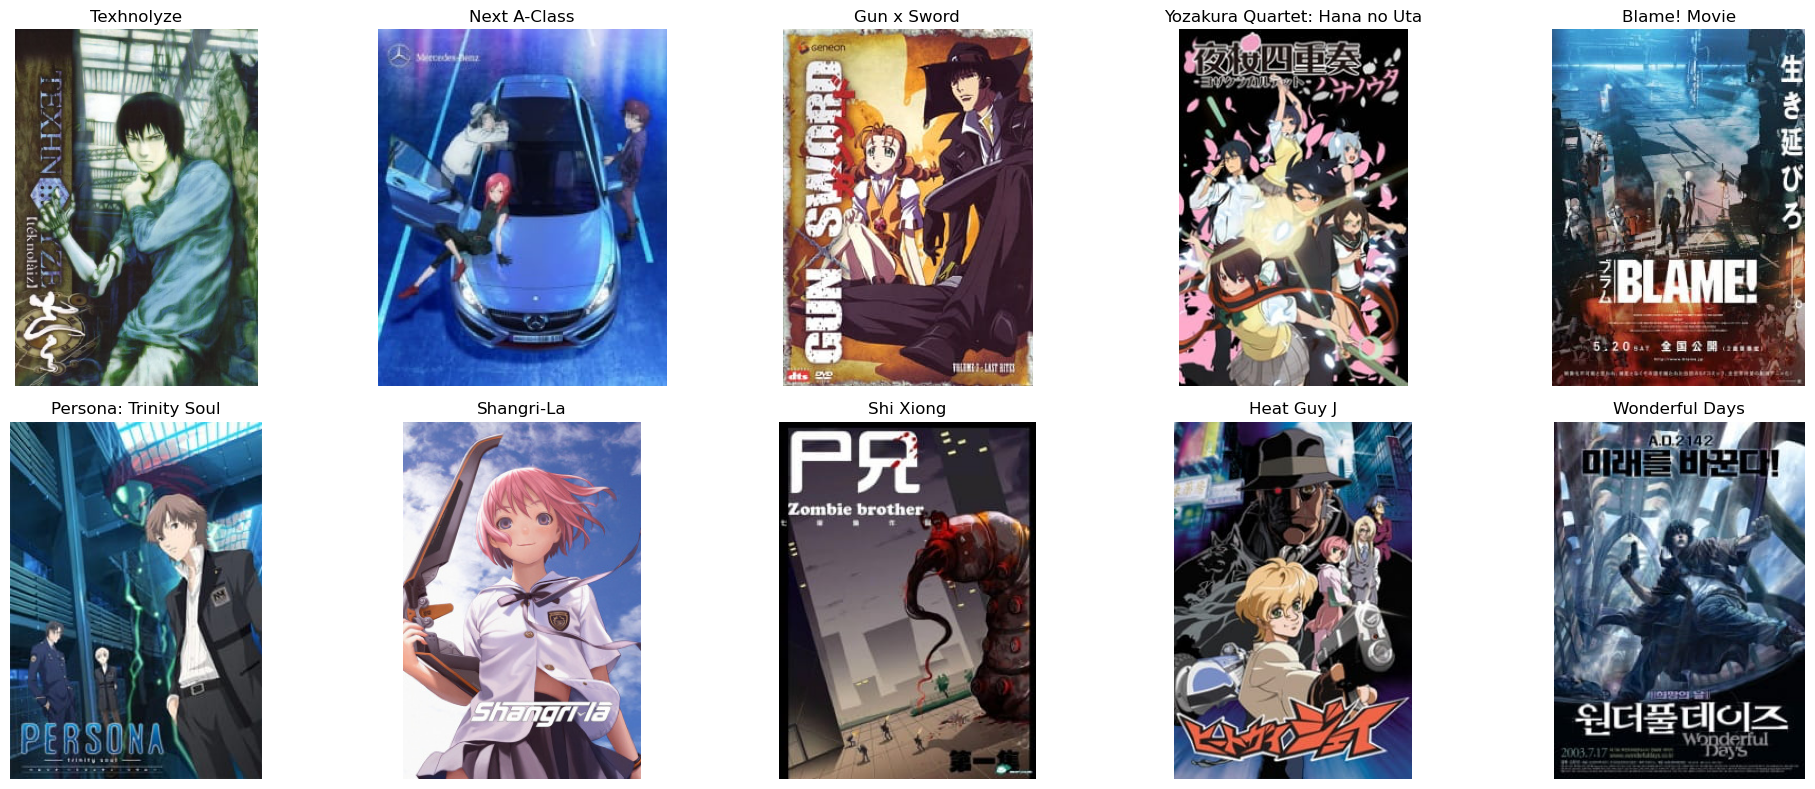

In [56]:
md(intro)
#--------------- ASK QUESTIONS TO USER -------------------------
ans = ask()

if 'fav_anime' in ans:
    fav_anime = ans['fav_anime']
    fav_a_gen = df[df['Name']==fav_anime]['Genres'].iloc[0].split(',')
    fav_a_rat = df[df['Name']==fav_anime]['Rating'].iloc[0].split(',')
    fav_a_typ = df[df['Name']==fav_anime]['Type'].iloc[0].split(',')
    
else:
    fav_anime = 1
if 'fav_anime' in ans:
    fav_gen = ans['fav_gen']+fav_a_gen
    fav_rat = ans['fav_rat']+fav_a_rat
    fav_typ = ans['fav_typ']+fav_a_typ
else:
    fav_gen = ans['fav_gen']
    fav_rat = ans['fav_rat']
    fav_typ = ans['fav_typ']


#-------------------------------SORT DATA BASED ON SELECTED GENERE RATING TYPE------------------------------------------------
if 'fav_anime' in ans:
#----------------------------------IF-else USER HAS ANY FAV ANIME---------------------------------------------
    final_gen= df[df['Name']==fav_anime]['Genres'].iloc[0].strip().split(',')
    final_gen=list(set(final_gen+fav_gen))

    gen_df = df[df['Genres'].apply(contain_fav_gen)]

    final_rat= df[df['Name']==fav_anime]['Rating'].iloc[0].strip().split(',')
    final_rat=list(set(final_rat+fav_rat))

    rat_df = gen_df[gen_df['Rating'].apply(contain_fav_rat)]

    final_typ= df[df['Name']==fav_anime]['Type'].iloc[0].strip().split(',')
    final_typ=list(set(final_typ+fav_typ))

    typ_df = rat_df[gen_df['Type'].apply(contain_fav_typ)]

    Final_df = typ_df
else:
    final_gen = fav_gen
    gen_df = df[df['Genres'].apply(contain_fav_gen)]

    final_rat = fav_rat
    rat_df = gen_df[gen_df['Rating'].apply(contain_fav_rat)]

    final_typ = fav_typ
    typ_df = rat_df[gen_df['Type'].apply(contain_fav_typ)]

    Final_df = typ_df
    
#--------------------------------IF USER HAS ANY FAV ANIME use ML------------------------------------------------

if 'fav_anime' in ans:
    
    Final_df['Combined_Feature'] = Final_df.apply(lambda row: f"{row['Score']} {row['Genres']} {row['Synopsis']} {row['Studios']} {row['Source']} {row['Rating']} {row['Popularity']} {row['Favorites']} {row['Members']}", axis=1)

    cout_to_recommand_anime = Final_df['anime_id'].count()
    cv = CountVectorizer(max_features=1000, stop_words='english')

    vector = cv.fit_transform(Final_df['Combined_Feature'].values.astype('object')).toarray()

    similar = cosine_similarity(vector)

    rec = recommend_Anime(fav_anime)


#-----------------------------else according to popularity-----------------------------------------------------
else :

    rec = recommend_Anime_for_nonWatcher()

#----------------------------------FINAL RECOMANDED ANIME------------------------------------------------


print("Here , Top 10 Recommanded Anime's for you")
show(rec)
